In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ordinal = pd.read_csv('BaseOrdinal.csv')
ordinal.shape

(2580, 83)

In [3]:
ordinal = ordinal.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinal.shape

(2580, 80)

In [4]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [5]:
gb = GradientBoostingRegressor(random_state=1)
cb = CatBoostRegressor(random_state=1, verbose=False)
xgb = XGBRegressor()
lgbm = lgb.LGBMRegressor()
ridge = Ridge()

### With Passthrough

In [6]:
stacking_regressor1 = StackingRegressor(estimators=[('GB', gb),('XGB', xgb),('LGBM', lgbm),('CB', cb)], final_estimator=ridge,
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1),
                                       passthrough=True)

In [7]:
stacking_regressor1.fit(X,y)

StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                  estimators=[('GB', GradientBoostingRegressor(random_state=1)),
                              ('XGB',
                               XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            enable_categorical=False,
                                            gamma=None, gpu_id=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            l...
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None,
                                            reg_alpha=None, reg_lambda=None,
                                            scale_pos_weight=None,
                                            subsample=None, tree_method=None,
                                            validate_parameters=None,
                                            verbosity=None)),
                              ('LGBM', LGBMRegressor()),
                              ('CB',
                               <catboost.core.CatBoostRegressor object at 0x7fc4d8cc43d0>)],
                  final_estimator=Ridge(), passthrough=True)

In [8]:
stacking_regressor1.score(X,y)

0.9892864526297362

### Without Passthrough

In [9]:
stacking_regressor2 = StackingRegressor(estimators=[('GB', gb),('XGB', xgb),('LGBM', lgbm),('CB', cb)], final_estimator=ridge,
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1),
                                       passthrough=False)

In [10]:
stacking_regressor2.fit(X,y)

StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                  estimators=[('GB', GradientBoostingRegressor(random_state=1)),
                              ('XGB',
                               XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            enable_categorical=False,
                                            gamma=None, gpu_id=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            l...
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None,
                                            reg_alpha=None, reg_lambda=None,
                                            scale_pos_weight=None,
                                            subsample=None, tree_method=None,
                                            validate_parameters=None,
                                            verbosity=None)),
                              ('LGBM', LGBMRegressor()),
                              ('CB',
                               <catboost.core.CatBoostRegressor object at 0x7fc4d8cc43d0>)],
                  final_estimator=Ridge())

In [11]:
stacking_regressor2.score(X,y)

0.9935340847804462

In [12]:
stacking_regressor4 = StackingRegressor(estimators=[('GB', gb),('XGB', xgb),('LGBM', lgbm),('CB', cb)], final_estimator=ridge,
                                       cv=5,
                                       passthrough=False)

In [13]:
stacking_regressor4.fit(X,y)

StackingRegressor(cv=5,
                  estimators=[('GB', GradientBoostingRegressor(random_state=1)),
                              ('XGB',
                               XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            enable_categorical=False,
                                            gamma=None, gpu_id=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=Non...
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None,
                                            reg_alpha=None, reg_lambda=None,
                                            scale_pos_weight=None,
                                            subsample=None, tree_method=None,
                                            validate_parameters=None,
                                            verbosity=None)),
                              ('LGBM', LGBMRegressor()),
                              ('CB',
                               <catboost.core.CatBoostRegressor object at 0x7fc4d8cc43d0>)],
                  final_estimator=Ridge())

In [14]:
stacking_regressor4.score(X,y)

0.991716030136736

In [15]:
scores4 = cross_validate(stacking_regressor4, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [16]:
scores4

{'fit_time': array([16.69410682, 18.39973807, 17.13676476, 16.52512813, 16.61929607]),
 'score_time': array([0.01062298, 0.01078892, 0.00997782, 0.00952888, 0.0102222 ]),
 'estimator': [StackingRegressor(cv=5,
                    estimators=[('GB', GradientBoostingRegressor(random_state=1)),
                                ('XGB',
                                 XGBRegressor(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              enable_categorical=False,
                                              gamma=None, gpu_id=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None,
                             

In [17]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, cv=cv, n_jobs=-1)
    
    #scores = cross_validate(model, X, y, scoring=scoring, 
    #                              cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [18]:
cat = evaluate_model(cb, X, y)

In [19]:
cat

,fit_time,score_time,test_score
0,6.303040,0.010245,0.926950
1,6.061009,0.009557,0.898789
2,6.134597,0.016481,0.936517
3,6.720150,0.010647,0.929022
4,6.118950,0.016548,0.950638
5,6.426193,0.010264,0.936688
6,6.036250,0.008483,0.942846
7,6.069967,0.010637,0.926769
8,5.894633,0.003311,0.945508
9,5.235593,0.004919,0.884738


In [20]:
cat = cat[['test_score']].rename(columns={'test_score':'cat_score'})

In [21]:
cat

,cat_score
0,0.926950
1,0.898789
2,0.936517
3,0.929022
4,0.950638
5,0.936688
6,0.942846
7,0.926769
8,0.945508
9,0.884738


In [22]:
df4 = evaluate_model(stacking_regressor4, X, y)

In [23]:
df4

,fit_time,score_time,test_score
0,115.558141,0.021185,0.919783
1,107.987261,0.034136,0.885066
2,126.224171,0.039379,0.935173
3,126.693525,0.044247,0.930582
4,117.793379,0.046584,0.950525
5,116.939274,0.048572,0.936203
6,116.668440,0.023863,0.941845
7,113.310844,0.021422,0.926557
8,113.373302,0.016566,0.944696
9,109.591572,0.011554,0.879584


In [24]:
df4 = df4[['test_score']].rename(columns={'test_score':'test_score_4'})

In [25]:
df4

,test_score_4
0,0.919783
1,0.885066
2,0.935173
3,0.930582
4,0.950525
5,0.936203
6,0.941845
7,0.926557
8,0.944696
9,0.879584


In [26]:
combo = pd.concat([cat, df4], axis=1)

In [27]:
combo

,cat_score,test_score_4
0,0.926950,0.919783
1,0.898789,0.885066
2,0.936517,0.935173
3,0.929022,0.930582
4,0.950638,0.950525
5,0.936688,0.936203
6,0.942846,0.941845
7,0.926769,0.926557
8,0.945508,0.944696
9,0.884738,0.879584


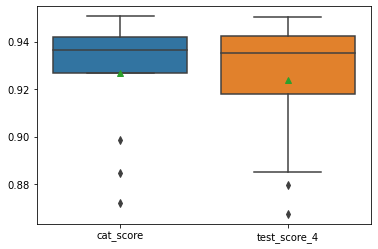

In [28]:
sns.boxplot(data=combo, showmeans=True);

In [29]:
combo.describe()

,cat_score,test_score_4
count,15.000000,15.000000
mean,0.926683,0.923797
std,0.023191,0.025964
min,0.872051,0.867490
25%,0.926860,0.917989
50%,0.936517,0.935173
75%,0.942064,0.942535
max,0.950638,0.950525
